# Urban land cover data classification prediction using multiclass RBF-SVM model

## ABSTRACT

## 1 INTRODUCTION

Urban land over classification is one of the widest used applications in the feild of remote sensing. The detailed knowledge of land cover is an important input variable for several urban environmental monitoring, especially in some applications like the study of urban sprawl, urban development plan, population or architecture density and monitoring of urban growth. Such target is also corresponding to the 3 strategic area of AISingapore (healthcare, urban and fintech) in 2018.

The overall objective of the architecture recognition is to automatically categorize all pixels in an image into land cover classes or themes. Accordingly the classification algorithms are important for the success of urban land cover classification process. Furthermore, how to improve the classification accuracy is the major challenge which effects the result. A large range of classification algorithms has been developed and applied for classifying data, e.g. SVMs [Support Vector Machines in Remote Sensing: A Review], Random Forests [Random Forest in Remote Sensing: A Review of Applications and
Future Directions], KNNs, DTs and ANN. However, these articles seldom applied in the area of classifying urban cover land, or lack the complete algorithm parameters optimization aimed at enhancing the accuracy.

In this page, SVM (Support Vector Machine) method is mainly used to work as the classifers to urban land cover research. On this basis, procedure of data preparation and preprocessing is described and conducted completely. Thus, cross validation with grid search is used to tuning the significant parameters of RBF-SVMs (select the RBF as the kernal function of SVM), along with other aspects optimization. Finally, results and limits are displayed and discussed.
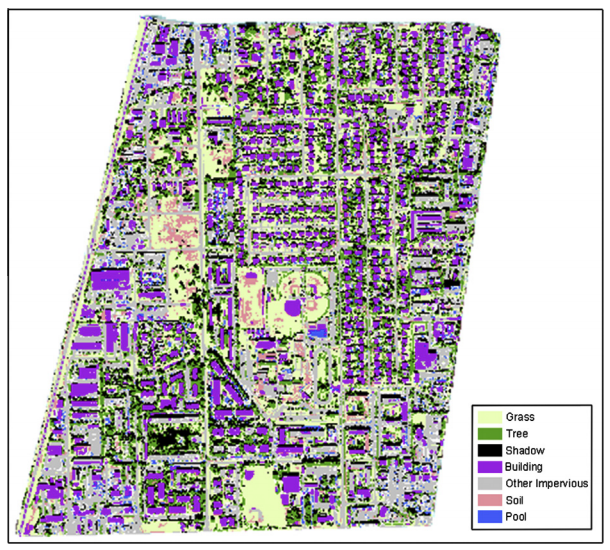
The dataset we used was obtained from the University of California, Irvine (IUC) Machine
Learning Depository (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover).

## 2 BASELINE APPROACH

### 2.1 SVMs (Support Vector Machines)
In [A Practical Guide to Support Vector Classification], the author gave the brief definition of SVMs. Given a training set of instance-label pairs ($x_i$, $y_i$) and $y \in \{1, -1\}^l$, the support vector machines (SVM) require the solution of the following optimization problem:

\begin{align}
\min\limits_{w, b, \xi} \frac{1}{2}w^Tw + C\sum_{i=1}^{l} \xi_i \\
subject\ to\quad  y_i(w^T\phi(x_i) + b) \ge 1-\xi_i, \ \xi_i \ge 0.
\end{align}


Here training vectors $x_i$ are mapped into a higher (maybe infinite) dimensional space by the function $\phi$. SVM finds a linear separating hyperplane with the maximal margin in this higher dimensional space. $C > 0$ is the penalt parameter of the error term. Furthermore, $K(x_i, x_j) = \phi(x_i)^T\phi(x_j)$ is called the kernel function. The basic kernals we considered in our research including:
- linear: $K(x_i, x_j)=X_i^Tx_j$.
- polynomial: $K(x_i, x_j)=(\gamma x_i^Tx_j + \gamma)^d, \gamma > 0$.
- radial basis function (RBF): $K(x_i, x_j) = exp(-\gamma\parallel x_i - x_j\parallel ^2), \gamma > 0$

Here, $\gamma, r, d$ are kernel parameters.


### 2.2 Multiclass SVMs
Traditional SVMs are used to handle the binary classification problem, in order to tackle the multiclass issues, two primary methodologies are introduced as OvO (One versus One) and OvR (One versus Rest).
- **OvR (One versus Rest)**

OvR strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classifiers to produce a real-valued confidence score for its decision, rather than just a class label; discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample.
- **OvO (One versus One)**

In the OvO reduction, one trains $K (K − 1) / 2$ binary classifiers for a K-way multiclass problem; each receives the samples of a pair of classes from the original training set, and must learn to distinguish these two classes. At prediction time, a voting scheme is applied: all $K (K − 1) / 2$ classifiers are applied to an unseen sample and the class that got the highest number of "+1" predictions gets predicted by the combined classifier.

![image](https://www.researchgate.net/profile/Yijing_Li5/publication/311977198/figure/fig7/AS:451738219094023@1484714192735/OVO-and-OVA-decomposition-schemes-Note-In-the-OVA-scheme-one-class-is-treated-as-a.png)

In this research, we used SVC python library which contains the "ovo" and "ovr" as the decision functions.

### 2.3 Dataset exploration
In our research, the urban land cover dataset was obtained from the University of California, Irvine (IUC) Machine
Learning Depository (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover). This high spatial urban landcover dataset of Deerfield Beach, Florida, was created using geographic object-based image analysis methods, with 9 classifications with the labels: **trees, grass, soil, concrete, asphalt, buildings, cars, pools, and shadows**. 

#### Data separation
 The whole dataset contains 675 samples, which are already divided into 507 (75%) train samples and 147 (25%) test samples. Each row has 147 variables of 7 coarser scale with 21 independent variables, which represent spectral, size, shape, and texture information. The details of the variables record in appendix. So our objective is building a model based on the train dataset, and apply to predict on the test dataset.

**Data features selection**

The dataset contains 1 class that means class target and 147 variables, obviously the variables dimensions are too huge. Since the 147 variables belong to 7 sets with the equivalent 21 variables, the only differences are the sensor image coarsers. Thus, the first 21 variables are picked out as the variables, remaining parts work as the comparative datasets to backup. The same operations are applied to both train dataset and test dataset, so as to get the train samples with the shape of 507\*21\*1 and test samples with the shape of 147\*21\*1.

**Target dummy codes**

In order to specify the targets better, the target Y are defined as the dummy codes of 9 different urban items from 1 to 9. Hence, the train target distributions, correlation matrics and variables distributions could be got as blow. 

In [1]:
# -*- coding: utf-8 -*-
__author__ = 'alexjzy'
# codes import part
import numpy as np
import seaborn as sns
np.random.seed(42)
import os

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt

# Sklearn part
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
# Pandas part
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
### Load dataset
path = os.getcwd()

train_path = "/train.csv"
test_path = "/test.csv"
dataset_path = "/dataset"

data_train = pd.read_csv(path + dataset_path + train_path)
data_test = pd.read_csv(path + dataset_path + test_path)
data_all = pd.concat([data_train, data_test])

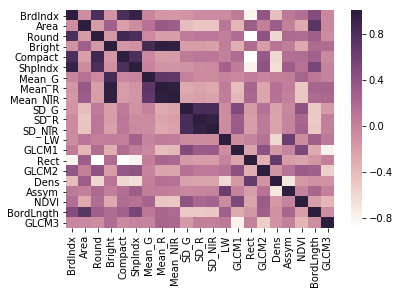

In [3]:
### correlation matrics
data_train.corr()
sns.heatmap(data_all.iloc[:, 1:22].corr(), cmap=sns.cubehelix_palette(light=1, as_cmap=True))

In [4]:
### get the train target statistics result
data_train['class'].value_counts()

building     97
concrete     93
tree         89
grass        83
asphalt      45
shadow       45
car          21
soil         20
pool         14
Name: class, dtype: int64

In [5]:
### variables distribution summary
data_train.iloc[:, 1:22].describe()

BrdIndx         Area       Round      Bright     Compact  \
count  507.000000   507.000000  507.000000  507.000000  507.000000   
mean     2.025720   562.504931    1.237574  165.612939    2.187081   
std      0.619254   698.655240    0.561988   63.230806    0.874054   
min      1.000000    22.000000    0.000000   26.850000    1.000000   
25%      1.580000   159.000000    0.840000  127.485000    1.650000   
50%      1.950000   323.000000    1.210000  170.650000    2.000000   
75%      2.380000   681.500000    1.565000  224.825000    2.490000   
max      4.530000  5767.000000    3.520000  245.870000    8.070000   

          ShpIndx      Mean_G      Mean_R    Mean_NIR        SD_G        SD_R  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean     2.277318  166.290355  162.291953  168.256667   10.725227    9.298422   
std      0.718441   59.217648   73.455101   69.702475    4.968761    4.204789   
min      1.040000   22.910000   26.520000   31.110000    3.550000    2.020000   
25%      1.715000  146.460000   97.585000  111.715000    6.985000    6.380000   
50%      2.180000  189.630000  158.280000  167.750000    9.290000    8.180000   
75%      2.675000  206.780000  237.375000  238.480000   13.330000   11.665000   
max      5.410000  239.370000  253.610000  253.630000   30.870000   29.650000   

           SD_NIR          LW       GLCM1        Rect       GLCM2        Dens  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean     9.151183    2.334320    0.562426    0.721953    6.546154    1.588225   
std      4.115763    1.695255    0.146751    0.147239    0.405564    0.343741   
min      2.090000    1.000000    0.090000    0.240000    4.920000    0.450000   
25%      6.460000    1.430000    0.460000    0.640000    6.360000    1.355000   
50%      8.170000    1.870000    0.570000    0.750000    6.580000    1.610000   
75%     11.125000    2.655000    0.680000    0.830000    6.790000    1.820000   
max     28.380000   22.670000    0.890000    1.000000    7.510000    2.300000   

            Assym        NDVI   BordLngth        GLCM3  
count  507.000000  507.000000  507.000000   507.000000  
mean     0.626193    0.025464  189.613412  2962.553116  
std      0.235664    0.174755  109.208690   873.563287  
min      0.090000   -0.380000   20.000000   874.100000  
25%      0.450000   -0.100000  108.000000  2393.865000  
50%      0.680000   -0.060000  172.000000  2948.700000  
75%      0.820000    0.185000  253.000000  3397.605000  
max      1.000000    0.410000  662.000000  6351.550000

In [6]:
### test the rough svm 
trainX = data_train.iloc[:, 1:22]
trainY = data_train.iloc[:, 0]

testX = data_test.iloc[:, 1:22]
testY = data_test.iloc[:, 0]


In [13]:
### SVMs with default parameters
def svmRoughModel(mod, kernel, trainX, trainY, testX, testY):
    mod.fit(trainX, trainY)
    
    train_pred = model.predict(trainX)
    train_acc = accuracy_score(trainY, train_pred)
    print("%s train accuracy: %f" % (kernel, train_acc))
    
    test_pred = model.predict(testX)
    test_acc = accuracy_score(testY, test_pred)
    print("%s test accuracy: %f" % (kernel, test_acc))
    
# RBF
model = SVC(kernel = 'rbf', random_state = 25, decision_function_shape='ovo')
svmRoughModel(model ,'rbf', trainX, trainY, testX, testY)


rbf train accuracy: 1.000000
rbf test accuracy: 0.154762


### 2.4 Baseline multiclass experiment

After the basic features selection and dataset split, we used the scikit-learn library "SVC" to work as the SVM classifier, set the kernel to be "rbf" and other parameters are all default. The result showed train dataset accuracy reached 1.00, however, the test dataset accuracy was only 0.15 using the trained model. As such, the model was obviously over-fit. And the multiclass methods showed no difference of using 'ovo' or 'ova'.

## 3 PROPOSED APPROACH

The baseline model based on the train dataset, showed a weak performance on test dataset, the root cause was that the specified hyperplanes confirmed by support vectors worked as hard margins. In addition, train dataset showed quite tremendous range gap between each column, and target labels quantities were imbalanced. Several processing and optimization were necessary to be researched in our proposed approaches.

As such, the proper procedures were proposed step by step as follows:
1. Scaling on train samples, apply the same scaler on test samples.
2. Implement $C$ and $\gamma$ to build soft margins for RBF kerel.
3. Apply grid search with cross validation to confirm $C$ and $\gamma$.
4. Take unbalanced class numbers and outliers into consideration.
5. Use the best parameters $C$ and $\gamma$ to train the whole training dataset.
6. Test on test samples.
7. Analyze the results.

### 3.1 Scaling the da

## EXPERIMENTAL RESULTS

## CONCLUSIONS

## REFERENCES

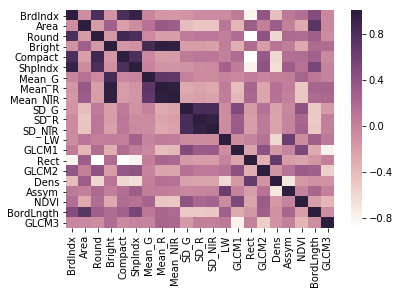

In [33]:
# -*- coding: utf-8 -*-
__author__ = 'alexjzy'
import numpy as np
import seaborn as sns
np.random.seed(42)
import os

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt

# Sklearn part
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
# Pandas part
import pandas as pd
pd.set_option('display.max_columns', 500)

# data = pd.read_csv("./dataset/train")
path = os.getcwd()

train_path = "/train.csv"
test_path = "/test.csv"
dataset_path = "/dataset"

data_train = pd.read_csv(path + dataset_path + train_path)
data_test = pd.read_csv(path + dataset_path + test_path)
data_all = pd.concat([data_train, data_test])
# data_all[data_all.filter(like='Area').columns]
data_all.corr()
sns.heatmap(data_all.iloc[:, 1:22].corr(), cmap=sns.cubehelix_palette(light=1, as_cmap=True))

In [15]:
# train data visualization

In [16]:
# convert the labels to encode numbers as a new column
def convertClassToEncodeNumber(df, benchmarkCol, newColName):
    labelEncoder = preprocessing.LabelEncoder()  # initial encoder
    labelEncoder.fit(df.loc[:, benchmarkCol])
    encodedData = labelEncoder.transform(df.loc[:, benchmarkCol])
    df[newColName] = encodedData
    return df

# scaler
def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler

# draw confusion matrix
def drawConfusionMatrix(title, cm):
    labels = sorted(data_train.iloc[:, 0].unique())
    ax= plt.subplot()
    heatmap = sns.heatmap(cm, annot=True, cmap="YlGnBu", ax = ax)
    heatmap.xaxis.set_ticklabels(labels, rotation=45); 
    heatmap.yaxis.set_ticklabels(labels, rotation=0);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)

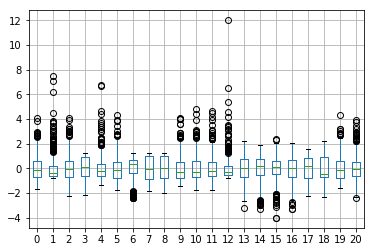

In [25]:
data_train = convertClassToEncodeNumber(data_train, "class", "Y")
data_test = convertClassToEncodeNumber(data_test, "class", "Y")
# several sets of data
# 1:22 ''
# 22:43 40
# 43:64 60
# 64:85 80
# 85:106 100
# 106:127 120
# 127:148 140
trainX = data_train.iloc[:, 1:22]
trainY = data_train.iloc[:, -1]
trainX_scale = standardScaler(trainX).transform(trainX)

testX = data_test.iloc[:, 1:22]
testY = data_test.iloc[:, -1]
testX_scale = standardScaler(trainX).transform(testX)

# trainX[pd.DataFrame(trainX_scale)].boxplot()
pd.DataFrame(trainX_scale).boxplot()


In [68]:
# SVM RBF

cRange = [15]
gammaRange = [0.015]
parameters = [{'kernel': ['rbf'], 'gamma': gammaRange,
                     'C': cRange}]

clf = GridSearchCV(cv = 9, estimator=SVC(decision_function_shape='ovr'), param_grid = parameters)
clf.fit(trainX_scale, trainY)
clf.grid_scores_
# clf.best_params_






# clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
#                        scoring='%s_weighted' % score)



# lin_clf = SVC(kernel='rbf', random_state=25, C = 15, gamma = 0.015, class_weight='balanced', decision_function_shape = 'ovo')
# lin_clf.fit(trainX_scale, trainY)

# trainY_pred = lin_clf.predict(trainX_scale)
# accuracyTrain = accuracy_score(trainY, trainY_pred)
# print("Train Accuracy: %f" % accuracyTrain)

# testY_pred = lin_clf.predict(testX_scale)
# accuracyTest = accuracy_score(testY, testY_pred)
# print("Test Accuracy: %f" % accuracyTest)

# scores = cross_val_score(lin_clf, trainX_scale, trainY, cv=5)
# lin_clf.score(trainX, trainY)
# lin_clf.score(testX_scale, testY)
# scores

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.79684, std: 0.06164, params: {'C': 15, 'gamma': 0.015, 'kernel': 'rbf'}]

Train Accuracy: 0.869822
Test Accuracy: 0.809524


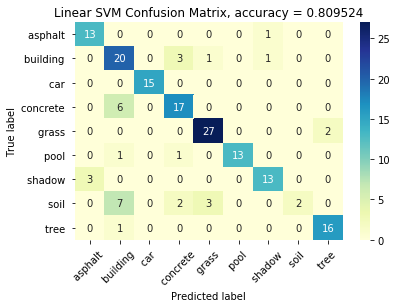

In [27]:
trainY_pred = lin_clf.predict(trainX_scale)
accuracyTrain = accuracy_score(trainY, trainY_pred)
print("Train Accuracy: %f" % accuracyTrain)

testY_pred = lin_clf.predict(testX_scale)
testY_pred

accuracyTest = accuracy_score(testY, testY_pred)
print("Test Accuracy: %f" % accuracyTest)

cm = confusion_matrix(testY, testY_pred)
title = 'Linear SVM Confusion Matrix, accuracy = %f' % accuracyTest
drawConfusionMatrix(title, cm)

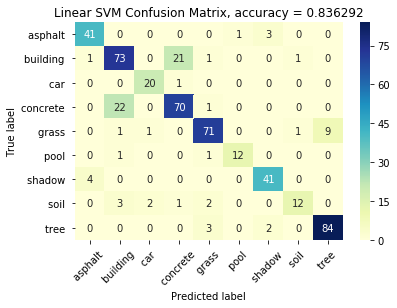

In [153]:
# SVM linear, multi_class = ovr
lin_clf = LinearSVC(random_state=42, multi_class='ovr')
lin_clf.fit(trainX_scale, trainY)
trainY_pred = lin_clf.predict(trainX_scale)
accuracy = accuracy_score(trainY, trainY_pred)
cm = confusion_matrix(trainY, trainY_pred)
title = 'Linear SVM Confusion Matrix, accuracy = %f' % accuracy
drawConfusionMatrix(title, cm)

In [204]:
data_test